In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score ,mean_absolute_percentage_error
from sklearn.svm import SVR

C:\Users\EVANS\AppData\Local\Temp\ipykernel_23468\3077618323.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
gold_data=pd.read_csv(r"C:\Users\EVANS\OneDrive\Desktop\python\gld_price_data.csv")

In [5]:
gold_data.head(4)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299


In [6]:
gold_data.tail(4)

,Date,SPX,GLD,USO,SLV,EUR/USD
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_data.shape

(2290, 6)

In [8]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
gold_data.describe().round(2)

,SPX,GLD,USO,SLV,EUR/USD
count,2290.00,2290.00,2290.00,2290.00,2290.00
mean,1654.32,122.73,31.84,20.08,1.28
std,519.11,23.28,19.52,7.09,0.13
min,676.53,70.00,7.96,8.85,1.04
25%,1239.87,109.73,14.38,15.57,1.17
50%,1551.43,120.58,33.87,17.27,1.30
75%,2073.01,132.84,37.83,22.88,1.37
max,2872.87,184.59,117.48,47.26,1.60


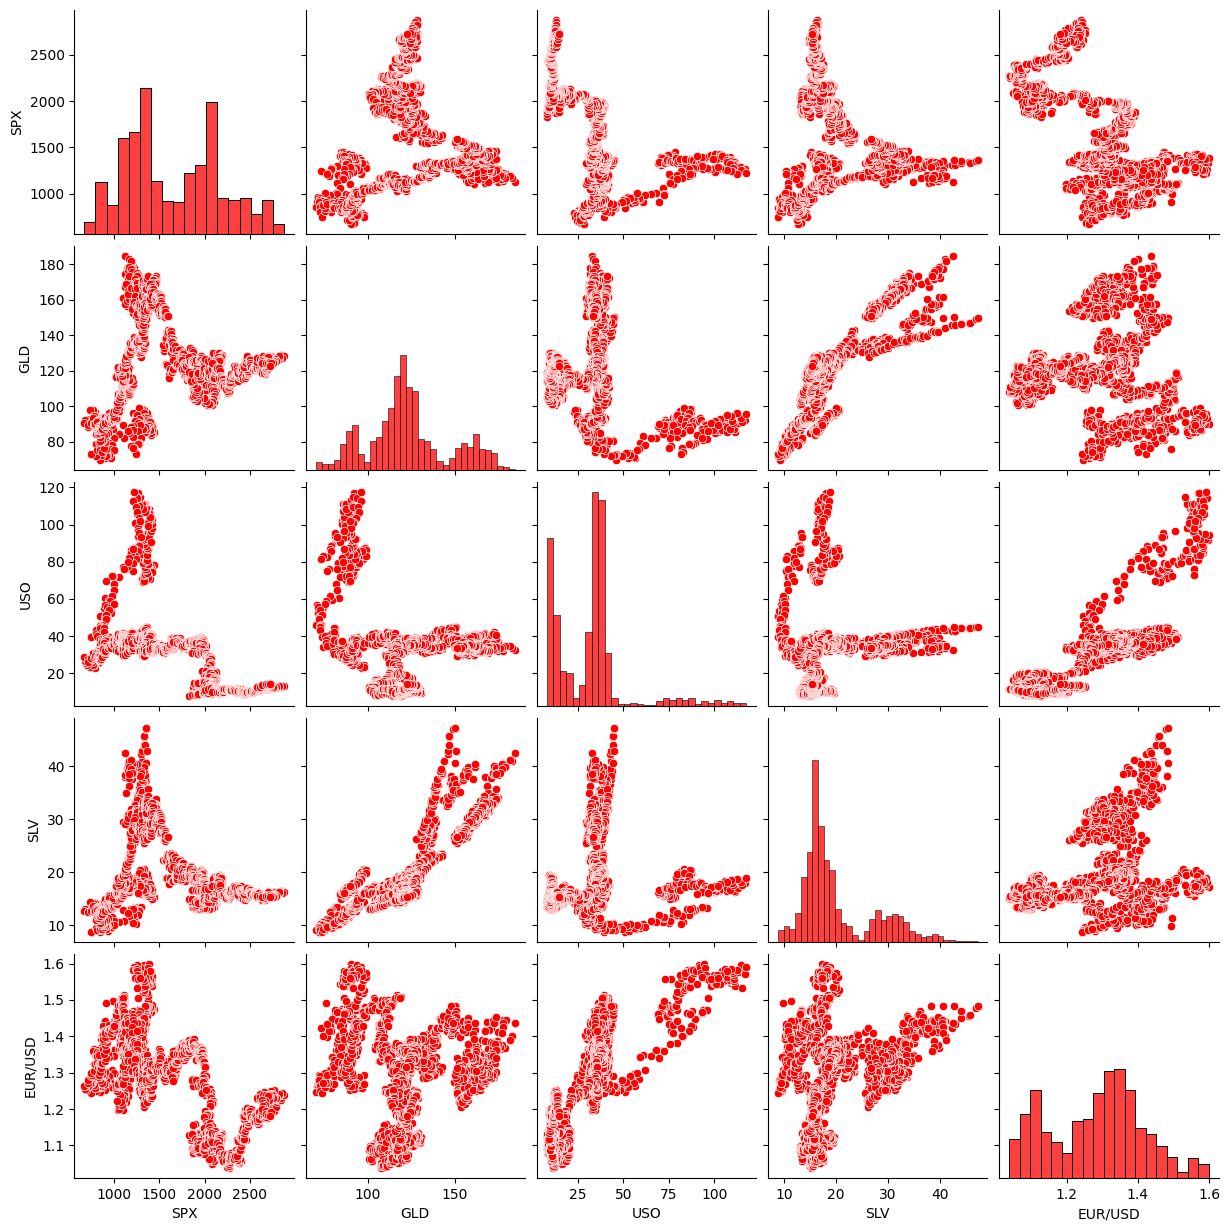

In [11]:
sns.pairplot(gold_data, 
             plot_kws={'color':'red'}, 
             diag_kws={'color':'red', 'edgecolor':'black'})

In [12]:
correlation = gold_data.drop(['Date'],axis=1).corr()

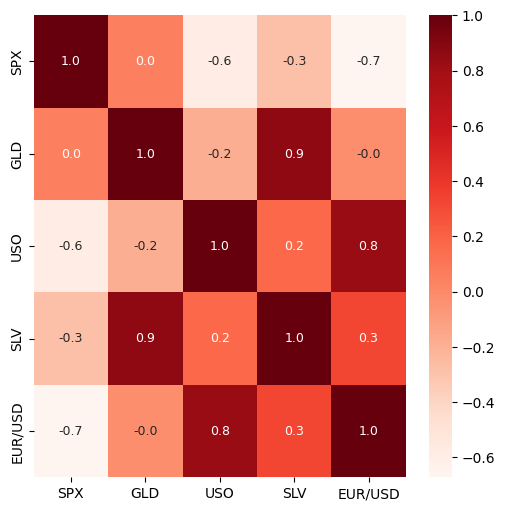

In [13]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar=True, square=False, fmt=".1f", annot=True, annot_kws={"size":9}, cmap="Reds");

In [14]:
correlation["GLD"].sort_values(ascending=False).round(2)

GLD        1.00
SLV        0.87
SPX        0.05
EUR/USD   -0.02
USO       -0.19
Name: GLD, dtype: float64

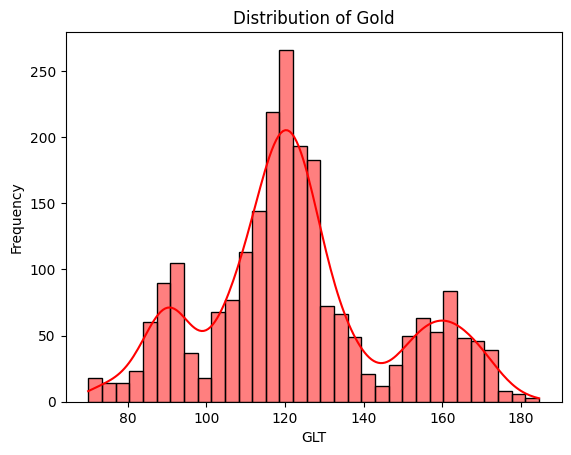

In [15]:
#Checking the distribution of the gold price
sns.histplot(gold_data["GLD"],color="Red",kde=True)
plt.title("Distribution of Gold")
plt.xlabel("GLT")
plt.ylabel("Frequency");

In [16]:
gold_data=gold_data.drop(columns="Date",axis=1)

In [17]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
#Splitting features and target
x=gold_data.drop(["GLD"],axis=1)
y=gold_data["GLD"]

In [19]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [20]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [21]:
#Splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
#Linear Regression
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)
print("Linear regression Train score :",linear_reg.score(x_train,y_train))
print("Linear regression Test score :", linear_reg.score(x_test,y_test))

Linear regression Train score : 0.8825517431707718
Linear regression Test score : 0.8762378772272373


In [23]:
linear_reg_y_pred= linear_reg.predict(x_test)

In [24]:
MAPE=mean_absolute_percentage_error(y_test,linear_reg_y_pred)
absolute_linear_reg=1-MAPE
print("Accuracy linear regression :",absolute_linear_reg)

Accuracy linear regression : 0.9516183515089895


In [25]:
#RandomForestRegressor//ExtraTreesRegressor
random_reg=RandomForestRegressor(n_estimators=100,random_state=100)
extra_reg=ExtraTreesRegressor(n_estimators=100,random_state=100)

In [26]:
random_reg.fit(x_train,y_train)
print("Random regressor Test score :", random_reg.score(x_test,y_test))
print("Random regressor Train score :", linear_reg.score(x_train,y_train))

Random regressor Test score : 0.9917843193352992
Random regressor Train score : 0.8825517431707718


In [27]:
extra_reg.fit(x_train,y_train)
print("Extra regressor Test score :", extra_reg.score(x_test,y_test))
print("Extra regressor Train score :", extra_reg.score(x_train,y_train))

Extra regressor Test score : 0.9948685983003405
Extra regressor Train score : 0.9999999999881736


In [28]:
random_reg_y_pred=random_reg.predict(x_test)
extra_reg_y_pred=extra_reg.predict(x_test)

In [29]:
#R2 value for Random and Extra regressors
extra_reg_r2_score=r2_score(y_test,extra_reg_y_pred)
print("Extra Regressor r2 score :",extra_reg_r2_score)

Rnadom_reg_r2_score=r2_score(y_test,random_reg_y_pred)
print("Random Regressor r2 score :",Rnadom_reg_r2_score)

Extra Regressor r2 score : 0.9948685983003405
Random Regressor r2 score : 0.9917843193352992


In [30]:
#M2 value for Extra and Random regressor
MAPE=mean_absolute_percentage_error(y_test,extra_reg_y_pred)
absolute_extra_reg=1-MAPE
print("Accuracy extra regressor :",absolute_extra_reg)

MAPE=mean_absolute_percentage_error(y_test,random_reg_y_pred)
accuracy_random_reg=1-MAPE
print("Accuracy random regressor :",accuracy_random_reg)

Accuracy extra regressor : 0.9917907094510864
Accuracy random regressor : 0.9897733215299755


In [31]:
#Support Vector Regressor
svm=SVR(kernel="linear")
svm.fit(x_train,y_train)

print("SVM regressor Test score :", svm.score(x_test,y_test))
print("SVM regressor Train score :", svm.score(x_train,y_train))

SVM regressor Test score : 0.822004475979117
SVM regressor Train score : 0.8534764139064492


In [32]:
svm_y_pred=svm.predict(x_test)
svm_r2_score=r2_score(y_test,svm_y_pred)
print("SVM r2 score :",svm_r2_score)

MAPE=mean_absolute_percentage_error(y_test,svm_y_pred)
absolute_svm=1-MAPE
print("Accuracy random regressor :",absolute_svm)


SVM r2 score : 0.822004475979117
Accuracy random regressor : 0.9559564560343462


In [33]:
predicted_df=pd.DataFrame({
    "linear_reg_y_pred":linear_reg_y_pred,
    "extra_reg_y_pred":extra_reg_y_pred,
    "random_reg_y_pred":random_reg_y_pred,
    "svm_y_pred":svm_y_pred,
    "y_test":y_test
})

In [34]:
predicted_df.head()

,linear_reg_y_pred,extra_reg_y_pred,random_reg_y_pred,svm_y_pred,y_test
607,125.805306,130.821601,131.236401,128.998357,129.470001
679,146.009063,132.932603,132.870002,151.924639,131.679993
418,106.688586,110.354198,109.628898,107.992631,110.820000
2244,120.972322,125.698002,125.542602,122.102866,125.389999
631,138.672589,137.130098,135.409899,142.934566,133.509995


In [35]:
best_model=[]
for ind in predicted_df.index:
    predicted_value=np.array(predicted_df[predicted_df.index==ind].values[0])
    predicted_value=np.abs(predicted_value[:-1] - predicted_value[-1])
    best_model.append(predicted_df.columns[np.argmin(predicted_value)])

predicted_df["best_model"]=best_model

In [36]:
predicted_df.head()

,linear_reg_y_pred,extra_reg_y_pred,random_reg_y_pred,svm_y_pred,y_test,best_model
607,125.805306,130.821601,131.236401,128.998357,129.470001,svm_y_pred
679,146.009063,132.932603,132.870002,151.924639,131.679993,random_reg_y_pred
418,106.688586,110.354198,109.628898,107.992631,110.820000,extra_reg_y_pred
2244,120.972322,125.698002,125.542602,122.102866,125.389999,random_reg_y_pred
631,138.672589,137.130098,135.409899,142.934566,133.509995,random_reg_y_pred


In [37]:
print("No of rows and Columns :",predicted_df.shape)
print(predicted_df["best_model"].value_counts())

No of rows and Columns : (458, 6)
best_model
extra_reg_y_pred     241
random_reg_y_pred    155
svm_y_pred            46
linear_reg_y_pred     16
Name: count, dtype: int64


In [ ]:
#visvalization 

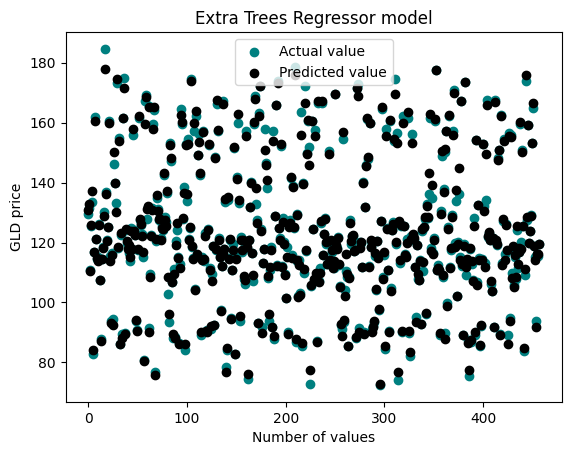

In [52]:
#Plot using the predicted Extra Trees Regressor model
plt.scatter(range(len(y_test)), y_test, color="teal", label="Actual value")
plt.scatter(range(len(random_reg_y_pred)), extra_reg_y_pred, color="black", label="Predicted value")
plt.title("Extra Trees Regressor model")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend();

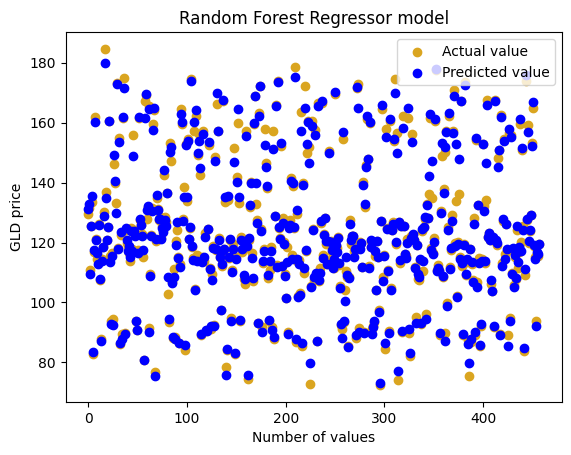

In [51]:
#Plot using the predicted Random Forest Regressor model
plt.scatter(range(len(y_test)), y_test, color="goldenrod", label="Actual value")
plt.scatter(range(len(random_reg_y_pred)), random_reg_y_pred, color="blue", label="Predicted value")
plt.title("Random Forest Regressor model")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend();

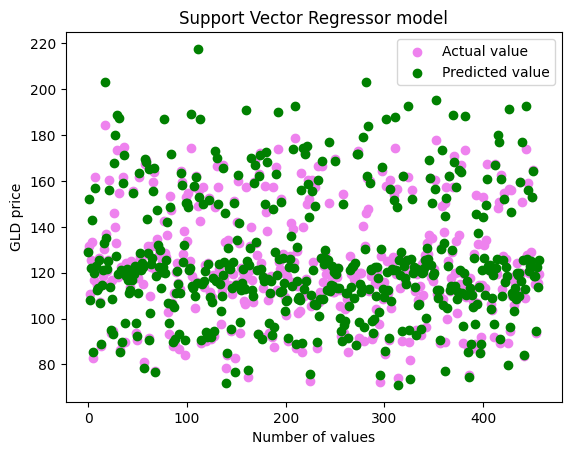

In [50]:
#Plot using the predicted Support Vector Regressor model
plt.scatter(range(len(y_test)), y_test, color="violet", label="Actual value")
plt.scatter(range(len(svm_y_pred)), svm_y_pred, color="green", label="Predicted value")
plt.title("Support Vector Regressor model")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend();

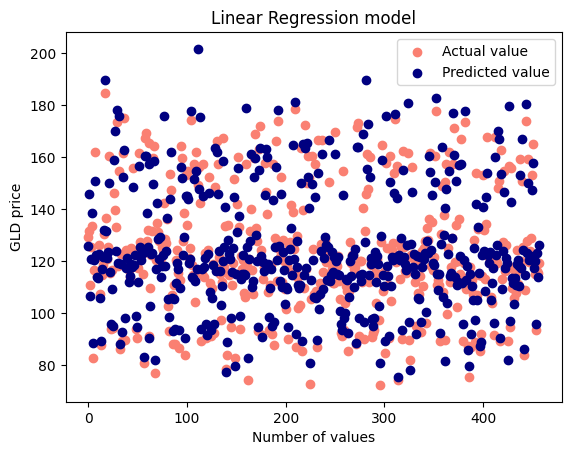

In [49]:
#Plot using the predicted Linear regression model
plt.scatter(range(len(y_test)), y_test, color="salmon", label="Actual value")
plt.scatter(range(len(linear_reg_y_pred)), linear_reg_y_pred, color="navy", label="Predicted value")
plt.title("Linear Regression model")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend();